# **Énoncé du Projet : Identifier la Prochaine Pépite Vidéoludique**
**Contexte :**

Nous sommes une entreprise d’édition de jeux vidéo, Visionary Games, spécialisée dans le développement de titres ambitieux et innovants. Alors que l’industrie du jeu vidéo s’apprête à accueillir l’événement majeur qu’est la sortie de GTA 6, nous voyons cette situation comme une opportunité unique de créer une alternative capable de rivaliser avec ce géant du marché.

Pour cela, nous avons besoin d’une analyse approfondie des données historiques des ventes de jeux vidéo entre 1980 et 2016. Votre mission est d’identifier les caractéristiques clés qui définissent un jeu à succès et de proposer un concept original qui pourrait capter l’attention des joueurs et concurrencer GTA 6.
Vous aurez comme ressource ce fichier csv : https://raw.githubusercontent.com/ValdisW/datasets/refs/heads/master/video-game-sales.csv

**Objectif :**

Analyser le fichier CSV fourni contenant les ventes historiques de jeux vidéo afin de :

1. Identifier les tendances et les facteurs de succès des jeux vidéo.
2. Proposer un concept de jeu vidéo basé sur ces observations pour maximiser les chances de succès.

**Livrables :**

Un rapport ou une présentation contenant :

* Une analyse des données (visualisations incluses).
* Des réponses claires aux questions posées dans l’objectif.
* Des recommandations stratégiques détaillées.
* Un fichier annexe avec vos analyses (Jupyter Notebook, fichiers Excel, etc.).

In [2]:
#Importer les librairies
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
#Importation des données et lecture
url = 'https://raw.githubusercontent.com/ValdisW/datasets/refs/heads/master/video-game-sales.csv'
df = pd.read_csv(url)


# Exploration des données

In [ ]:
df.info()

In [ ]:
df.shape

In [4]:
df = df.drop_duplicates()
df = df.dropna()
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
#Comptage des valeurs (jeux) par console
df['Platform'].value_counts()

In [ ]:
df['Genre'].value_counts()

In [ ]:
#Comptage et emergence des éditeurs
df['Publisher'].value_counts()

# KPI Ventes

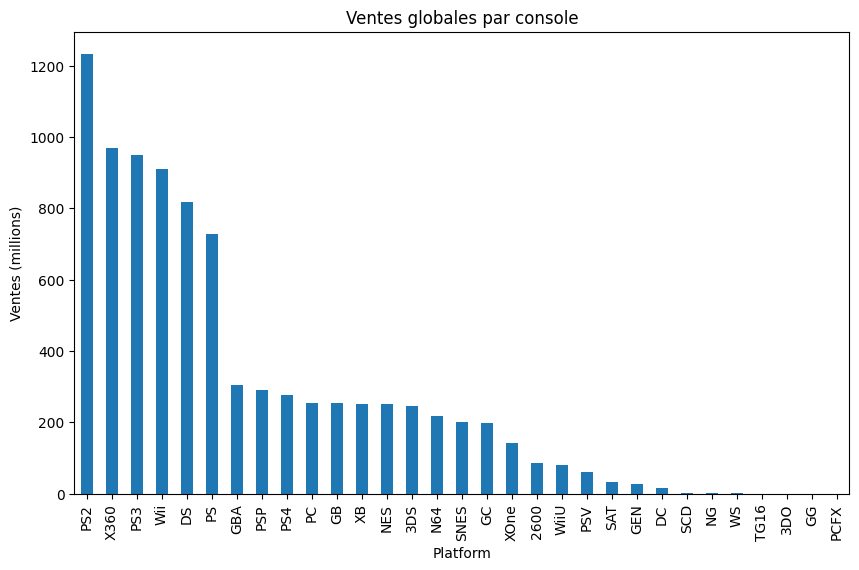

In [4]:
# Consoles les plus vendues
consoles_vendues = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
consoles_vendues.plot(kind='bar', figsize=(10, 6), title='Ventes globales par console')
plt.ylabel('Ventes (millions)')
plt.show()


Les consoles les plus vendues sont la PS2, la X360, la PS3, la Wii, la DS et la PS.

                        Name  Global_Sales
0                 Wii Sports         82.74
1          Super Mario Bros.         40.24
2             Mario Kart Wii         35.82
3          Wii Sports Resort         33.00
4   Pokemon Red/Pokemon Blue         31.37
5                     Tetris         30.26
6      New Super Mario Bros.         30.01
7                   Wii Play         29.02
8  New Super Mario Bros. Wii         28.62
9                  Duck Hunt         28.31


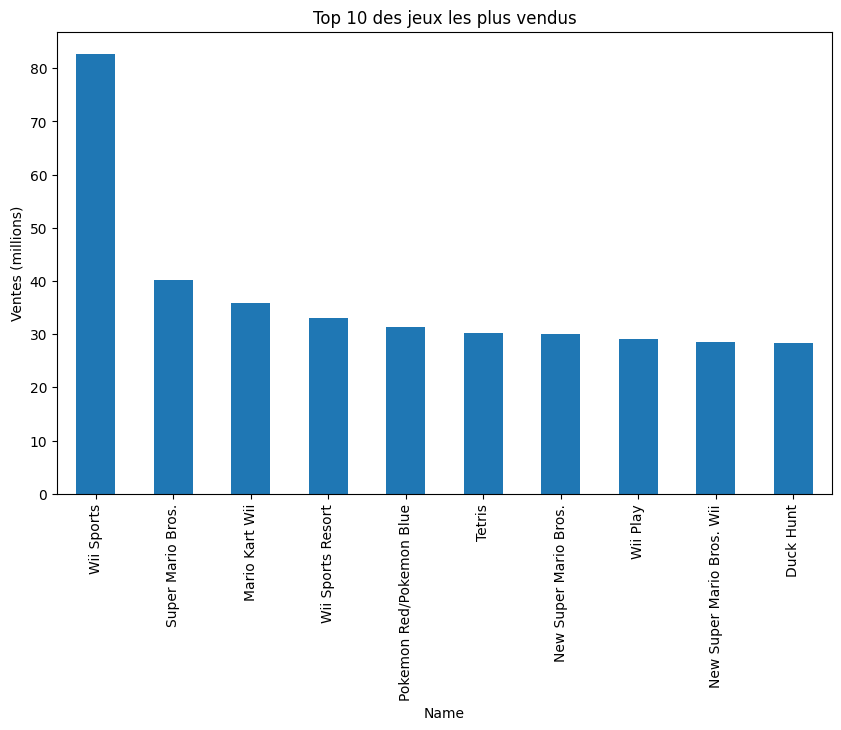

In [ ]:
#Jeux les plus vendus
jeux_vendus = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
print(jeux_vendus)
jeux_vendus.set_index('Name')['Global_Sales'].plot(kind='bar', figsize=(10, 6), title='Top 10 des jeux les plus vendus')
plt.ylabel('Ventes (millions)')
plt.show()


Wii Sports, Super Mario Bros, Mario Kart Wii, Wii Sports Resort, Pokemon Red, Pokemon Blue, Tetris, New Super Mario Bros, Wii Play, New Super Mario Bros. Wii et Duck Hunt sont les jeux les plus vendus.


Genre
Platform        0.947577
Shooter         0.800468
Role-Playing    0.628456
Racing          0.593273
Sports          0.568247
Fighting        0.531160
Action          0.529942
Misc            0.468488
Simulation      0.459882
Puzzle          0.424930
Strategy        0.258612
Adventure       0.184137
Name: Global_Sales, dtype: float64


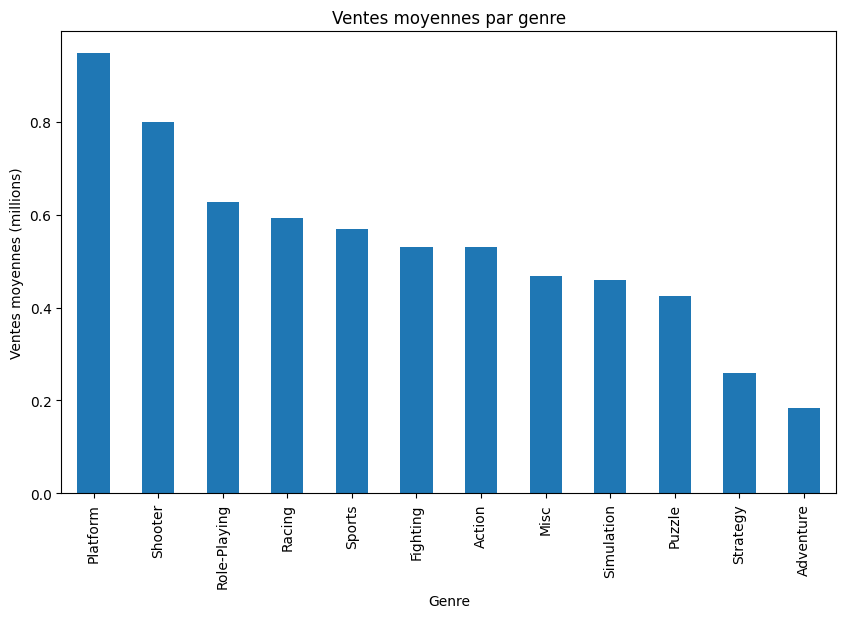

In [19]:
#Ventes moyennes par genre
ventes_par_genre = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
print(ventes_par_genre)
ventes_par_genre.plot(kind='bar', figsize=(10, 6), title='Ventes moyennes par genre')
plt.ylabel('Ventes moyennes (millions)')
plt.show()


Nous constatons que les genres les plus populaires sont Plateform et Shooter mais les autres se suivent d'assez prêts.

Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.541337
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64


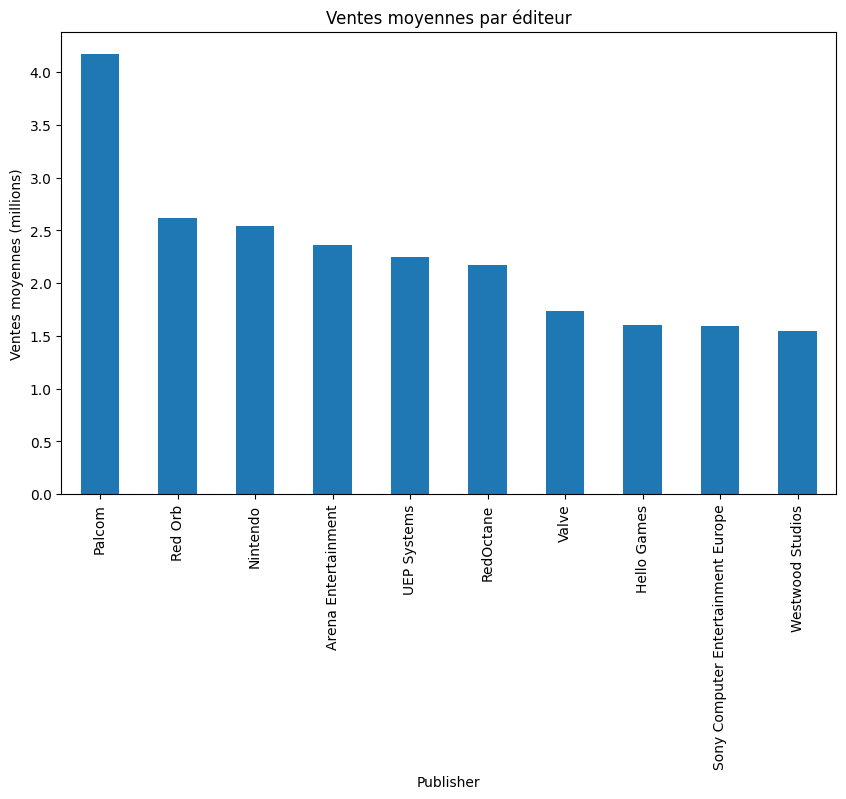

In [ ]:
#Ventes moyennes par éditeur
ventes_par_editeur = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)
print(ventes_par_editeur)
ventes_par_editeur.plot(kind='bar', figsize=(10, 6), title='Ventes moyennes par éditeur')
plt.ylabel('Ventes moyennes (millions)')
plt.show()


Palcom ressort bien largement

NA_Sales       0.264667
EU_Sales       0.146652
JP_Sales       0.077782
Other_Sales    0.048063
dtype: float64


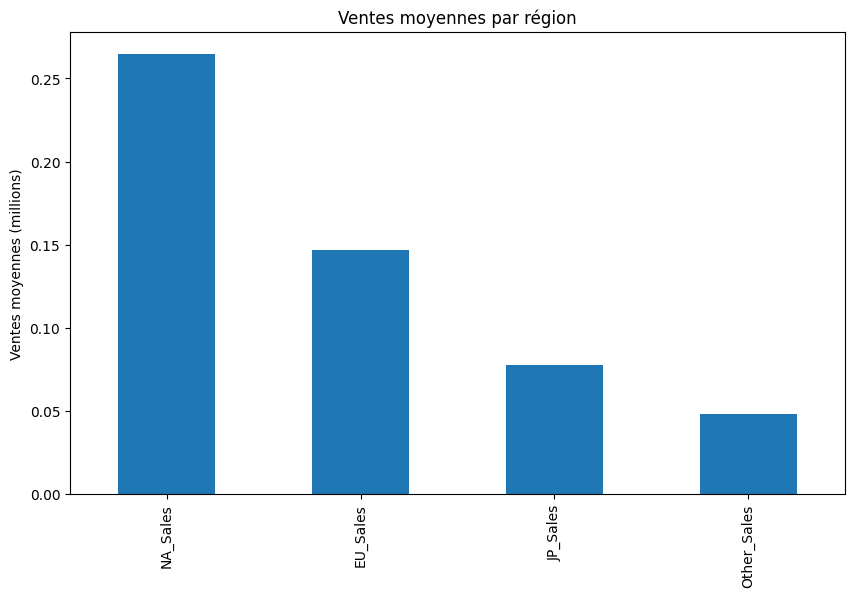

In [ ]:
#Ventes moyennes par pays
pays_ventes = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
print(pays_ventes)
pays_ventes.plot(kind='bar', figsize=(10, 6), title='Ventes moyennes par région')
plt.ylabel('Ventes moyennes (millions)')
plt.show()


L'Amérique du Nord réalise le plus de ventes. C'est un pays très consommateur.

# KPI Genres et Plateformes

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


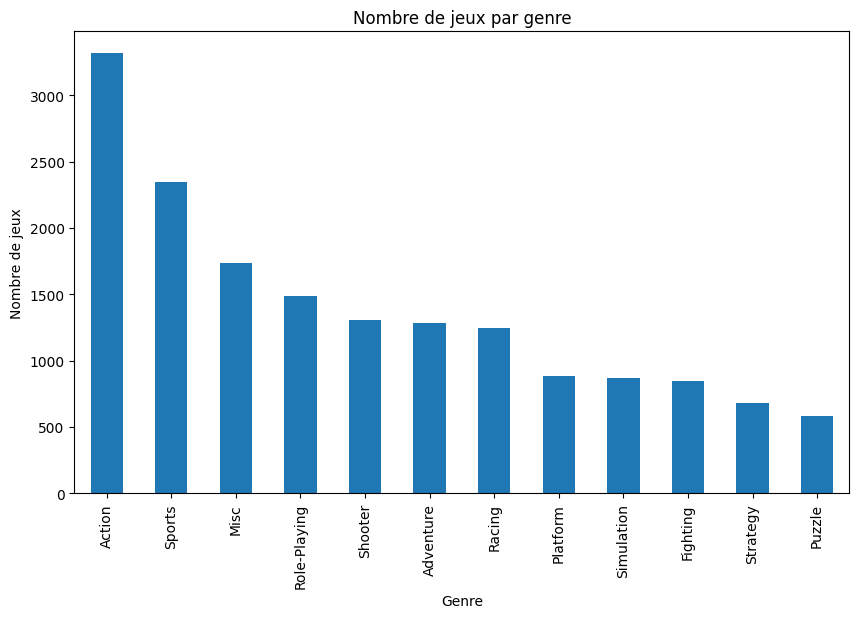

In [ ]:
# Nombre de jeux par genre
jeux_par_genre = df['Genre'].value_counts()
print(jeux_par_genre)
jeux_par_genre.plot(kind='bar', figsize=(10, 6), title='Nombre de jeux par genre')
plt.ylabel('Nombre de jeux')
plt.show()


Action est le plus représentatif avec plus de 3000 jeux. Suivi de Sports avec plus de 2300. Puzzle est en dernier avec tout juste plus de 500.

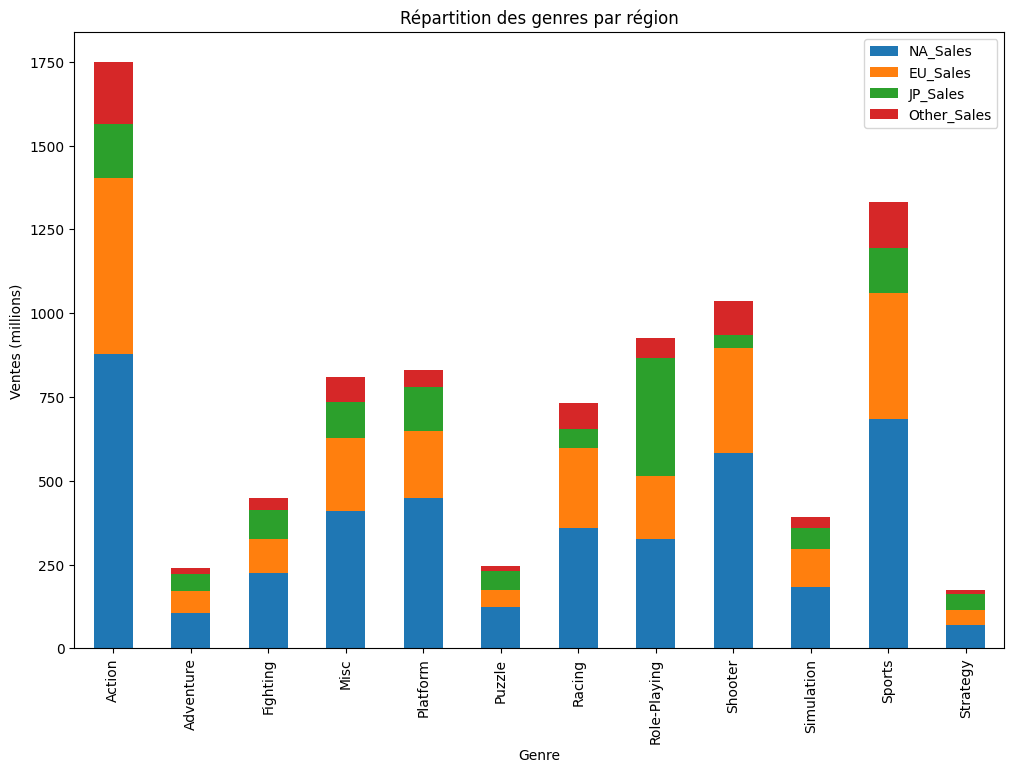

In [ ]:
# Répartition des genres par pays
genres_par_pays = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
genres_par_pays.plot(kind='bar', stacked=True, figsize=(12, 8), title='Répartition des genres par région')
plt.ylabel('Ventes (millions)')
plt.show()


Sans surprise, NA domine toujours le marché.

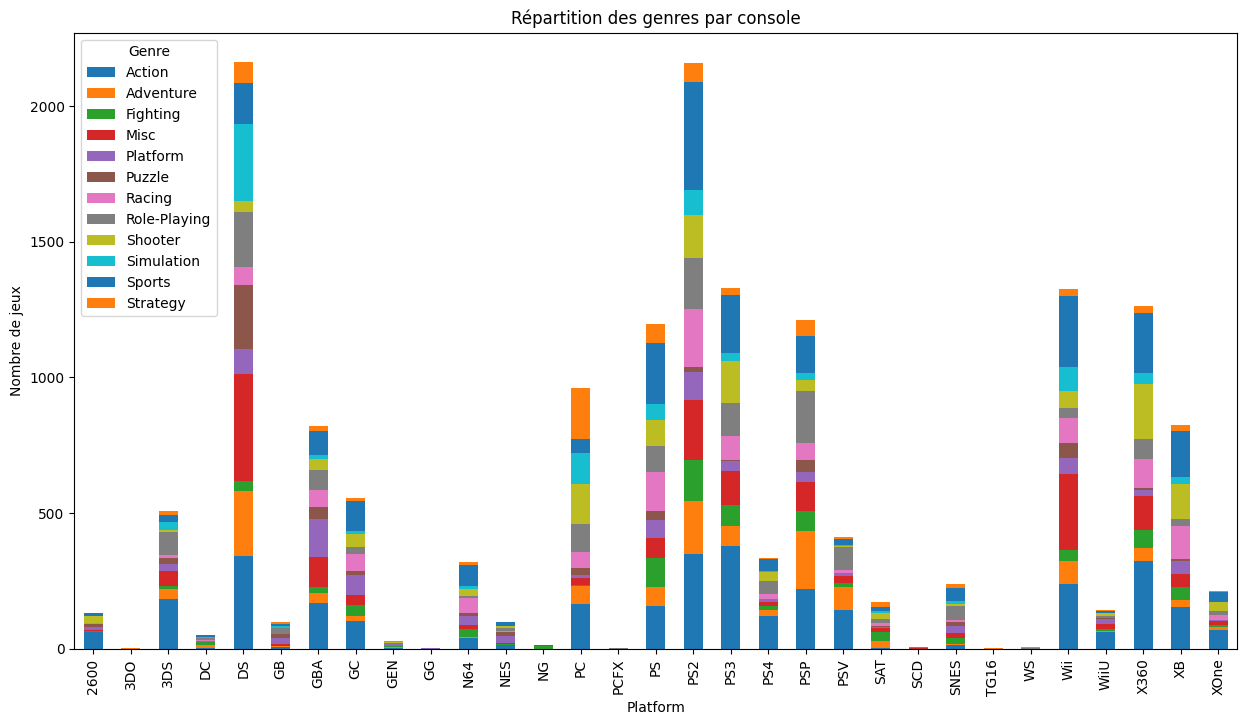

In [ ]:
#Repartition des genres par console
genres_par_console = df.groupby(['Platform', 'Genre']).size().unstack()
genres_par_console.plot(kind='bar', stacked=True, figsize=(15, 8), title='Répartition des genres par console')
plt.ylabel('Nombre de jeux')
plt.show()


La DS ne fait pas partie de notre analyse car un jeu capable de concurrencer GTA VI ne peut pas sortir sur une console portable ; néanmoins il sagit d'une console avec un catalogue très riche. La PS2 est très interressante également.

# KPI Tendances

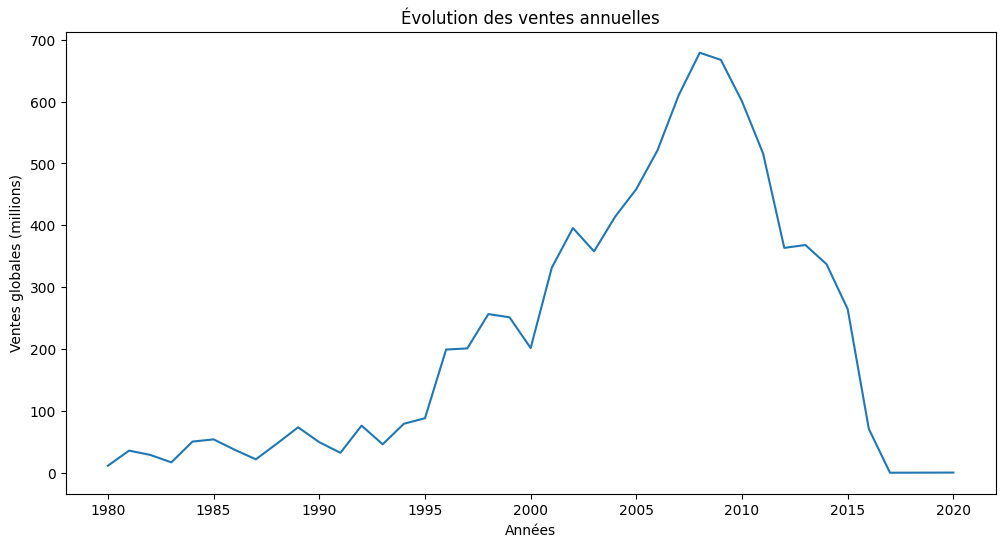

In [20]:
# Evolution des ventes par années
df['Year'] = df['Year'].fillna(0).astype(int)  # Remplir les NaN avant la conversion
ventes_annuelles = df.groupby('Year')['Global_Sales'].sum()
ventes_annuelles.plot(kind='line', figsize=(12, 6), title="Évolution des ventes annuelles")
plt.ylabel('Ventes globales (millions)')
plt.xlabel('Années')
plt.show()


On constate une nette évolution des ventes globales a partir des années 2000 ainsi qu'un pic en 2008.

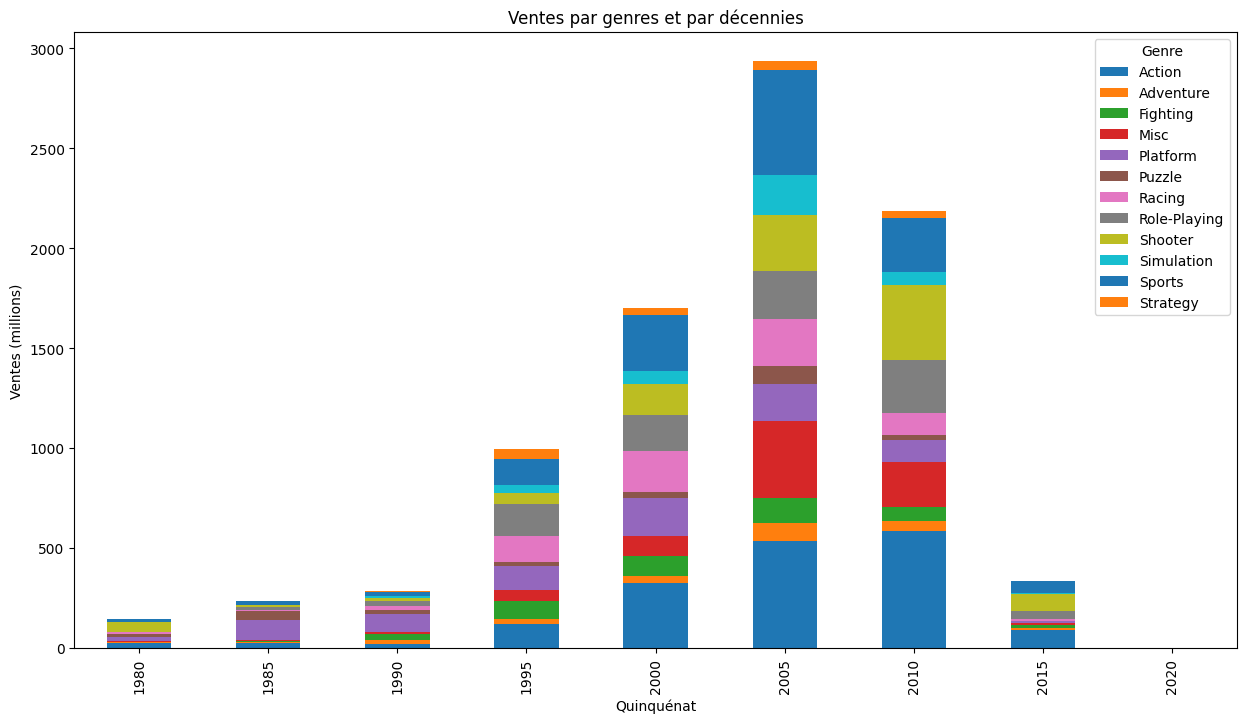

In [21]:
#Genre populaire par tranche de 5 ans
df['tranche'] = (df['Year'] // 5) * 5
genres_par_tranche = df.groupby(['tranche', 'Genre'])['Global_Sales'].sum().unstack()
genres_par_tranche.plot(kind='bar', stacked=True, figsize=(15, 8), title='Ventes par genres et par décennies')
plt.ylabel('Ventes (millions)')
plt.xlabel('Quinquénat')
plt.show()



Le pic des genre se situe en 2005 où l'on observe une richesse de genres différents. Les genres Action, Misc Sports, Shooter et Plateforme sont les plus flagrants.

# KPI Editeurs

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.54
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64


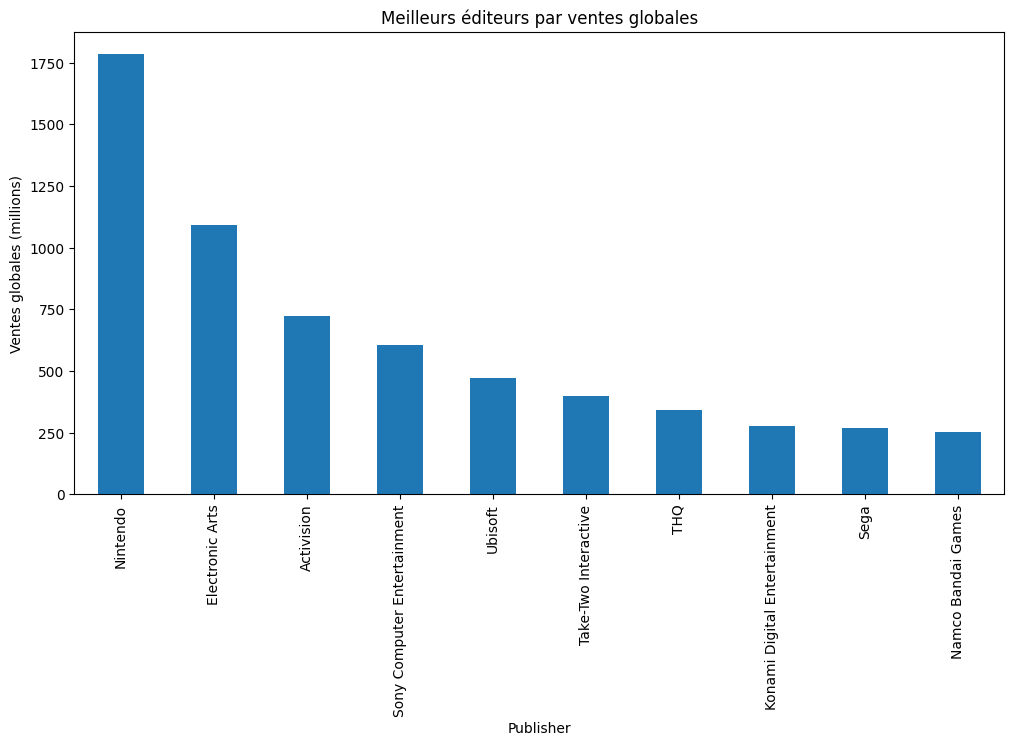

In [22]:
# Quels sont les meilleurs éditeurs ?
meilleurs_editeurs = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
print(meilleurs_editeurs)
meilleurs_editeurs.plot(kind='bar', figsize=(12, 6), title="Meilleurs éditeurs par ventes globales")
plt.ylabel('Ventes globales (millions)')
plt.show()


Nintendo est largement en tête avec plus de 1750 millions de ventes. Suivi de loin par EA et Activision.

Publisher
Nintendo                        20.250069
Electronic Arts                 12.408009
Activision                       8.186705
Sony Computer Entertainment      6.891535
Ubisoft                          5.373827
Take-Two Interactive             4.531336
THQ                              3.863381
Konami Digital Entertainment     3.161155
Sega                             3.071958
Namco Bandai Games               2.878471
Name: Global_Sales, dtype: float64


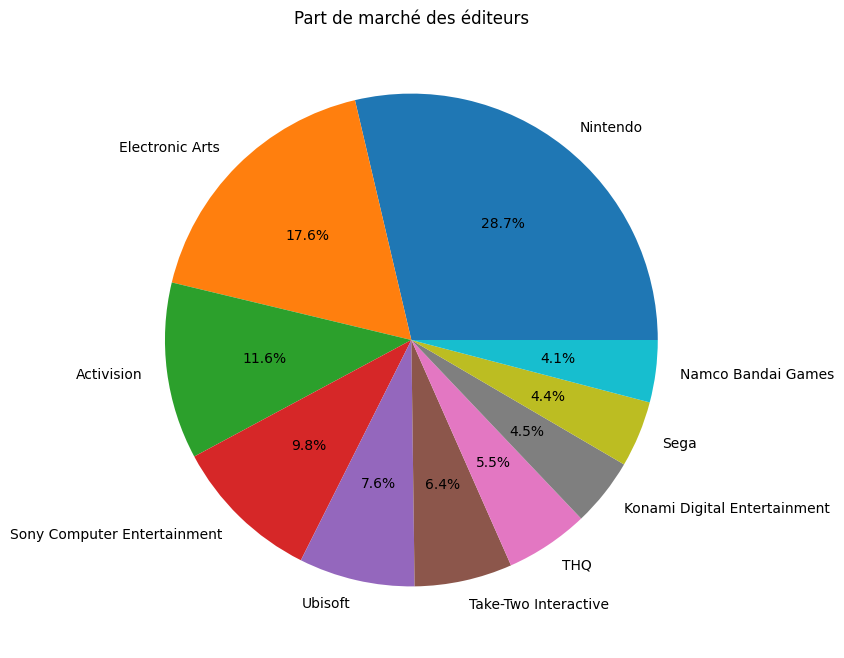

In [23]:
# Part de marché par éditeur
part_de_marche = (meilleurs_editeurs / df['Global_Sales'].sum()) * 100
print(part_de_marche)
part_de_marche.plot(kind='pie', figsize=(8, 8), title='Part de marché des éditeurs', autopct='%1.1f%%')
plt.ylabel('')
plt.show()


Ce graphe confirme le graphe précédent

In [25]:
# Extraire le top 5 des éditeurs par part de marché pour chaque région
top_10_regions = {}
for region in regions:
    top_10_regions[region] = part_de_marche_df[region].nlargest(100)
top_df = pd.concat(top_10_regions, axis=1)
top_df = top_df.dropna()
top_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
Nintendo,18.849722,17.380718,35.427908,12.066015
Electronic Arts,13.499705,15.264949,1.088556,16.178018
Activision,9.843911,8.880246,0.509239,9.480169
Sony Computer Entertainment,6.128499,7.792861,5.769815,10.191277
Ubisoft,5.841739,6.774034,0.570752,6.358140


On constate que le Japon est en tête sur Nintendo mais que globalement NA  reste devant.

In [24]:
df['Global_Sales'] = df['Global_Sales'].fillna(0)


In [26]:

jeux_par_editeur = df.groupby('Publisher').size().sort_values(ascending=False).head(10)
jeux_par_editeur = jeux_par_editeur.dropna()
succes_par_editeur = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)
succes_par_editeur = succes_par_editeur.dropna()
print(pd.DataFrame({'Jeux publiés': jeux_par_editeur, 'Succès moyen (ventes)': succès_par_editeur}))


                                    Jeux publiés  Succès moyen (ventes)
Publisher                                                              
Activision                                 966.0                    NaN
Arena Entertainment                          NaN               2.360000
Electronic Arts                           1339.0                    NaN
Hello Games                                  NaN               1.600000
Konami Digital Entertainment               823.0                    NaN
Namco Bandai Games                         928.0                    NaN
Nintendo                                   696.0               2.563836
Palcom                                       NaN               4.170000
Red Orb                                      NaN               2.620000
RedOctane                                    NaN               2.170000
Sega                                       632.0                    NaN
Sony Computer Entertainment                682.0                

In [30]:
# Jeux par éditeur et succès moyen
jeux_par_editeur = df.groupby('Publisher').size()
succès_par_editeur = df.groupby('Publisher')['Global_Sales'].mean()
editeurs_stats = pd.DataFrame({
    'Jeux publiés': jeux_par_editeur,
    'Succès moyen (ventes)': succès_par_editeur
})
top_10_editeurs = editeurs_stats.sort_values(by='Succès moyen (ventes)', ascending=False).head(10)
top_10_editeurs


,Jeux publiés,Succès moyen (ventes)
Publisher,,
Palcom,1,4.170000
Red Orb,2,2.620000
Nintendo,696,2.563836
Arena Entertainment,2,2.360000
UEP Systems,1,2.250000
RedOctane,4,2.170000
Valve,1,1.740000
Hello Games,1,1.600000
Sony Computer Entertainment Europe,15,1.592667


# KPI Recommandations stratégiques

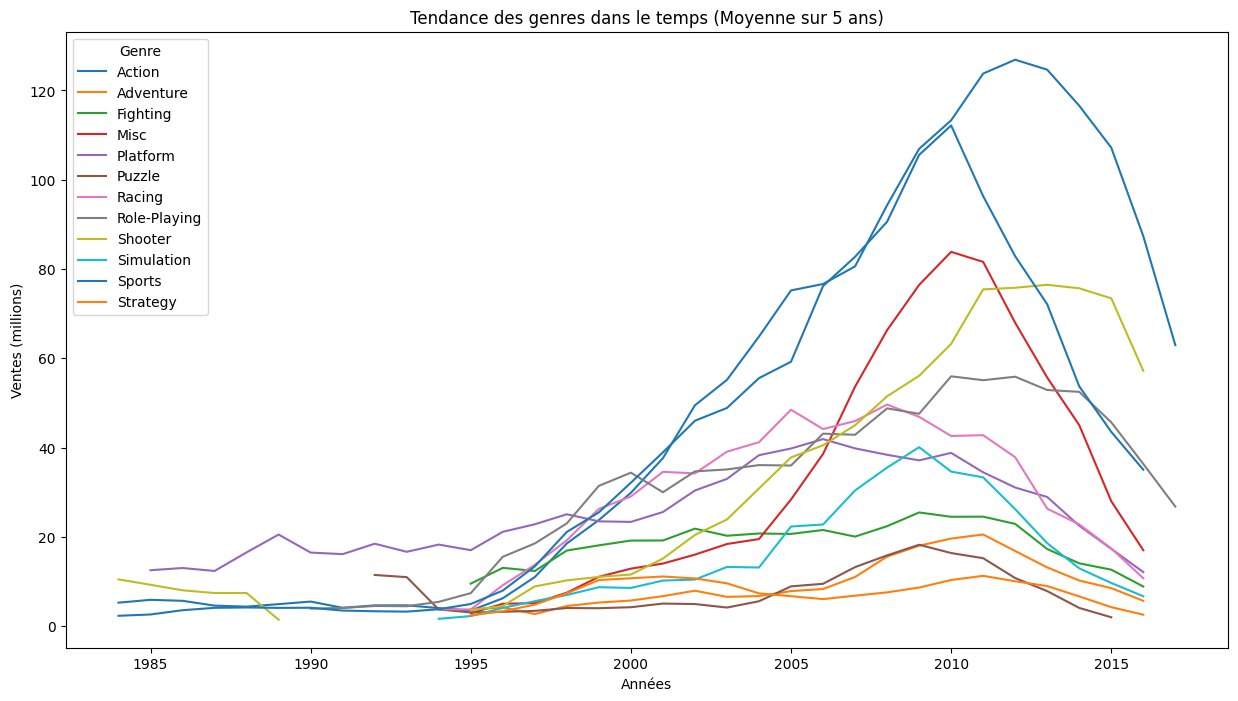

In [29]:
# Genres dont la popularité augmente dans le temps
genres_tendance = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack().rolling(5).mean()
genres_tendance.plot(figsize=(15, 8), title='Tendance des genres dans le temps (Moyenne sur 5 ans)')
plt.ylabel('Ventes (millions)')
plt.xlabel('Années')
plt.show()


Plateforme était en tête jusque la fin du XXeme siècle. Depuis Action et Sports dominent ainsi que Misc qui arrive en troisième place. Le pic se situe en 2010 et 2012.

In [30]:
# Jeux ayant le plus marqué
top_jeux = df[['Name', 'Global_Sales', 'Genre', 'Platform']].sort_values(by='Global_Sales', ascending=False).head(10)
print(top_jeux)


                        Name  Global_Sales         Genre Platform
0                 Wii Sports         82.74        Sports      Wii
1          Super Mario Bros.         40.24      Platform      NES
2             Mario Kart Wii         35.82        Racing      Wii
3          Wii Sports Resort         33.00        Sports      Wii
4   Pokemon Red/Pokemon Blue         31.37  Role-Playing       GB
5                     Tetris         30.26        Puzzle       GB
6      New Super Mario Bros.         30.01      Platform       DS
7                   Wii Play         29.02          Misc      Wii
8  New Super Mario Bros. Wii         28.62      Platform      Wii
9                  Duck Hunt         28.31       Shooter      NES


Wii Sports en tête car vendu avec la Wii lors de l'achat. Suivi par Mario Kart et Pokemon Red/Blue. Nintendo surclasse les autres éditeurs.

# Autres graphiques

<ipython-input-20-9c04507de4d9>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'Global_Sales'))


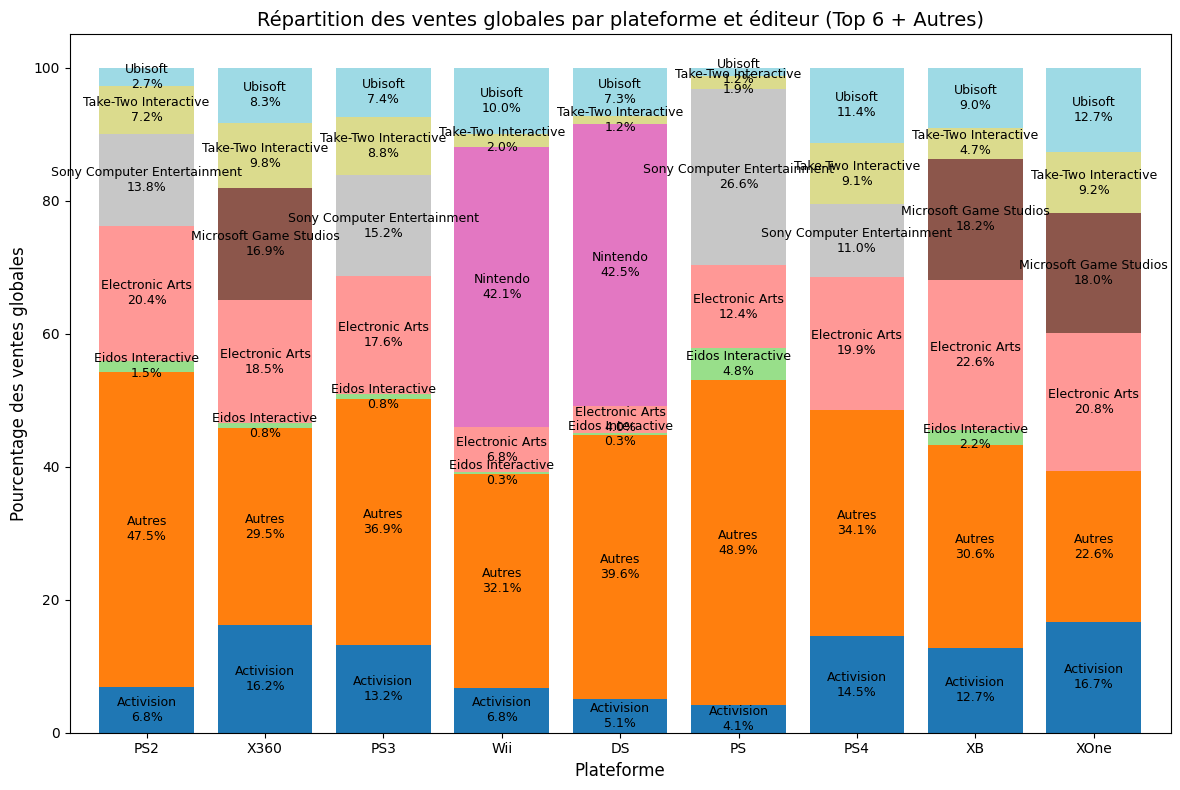

In [ ]:
# On va chercher les plus gros éditeurs et créer un segment 'Autres' pour les moins importants suivant les consoles et les ventes globales et on affichera les pourcentages pour une première représentation.
selected_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XB', 'XOne']
filtered_df = df[df['Platform'].isin(selected_platforms)]
sales_by_platform_publisher = (
    filtered_df.groupby(['Platform', 'Publisher'])['Global_Sales']
    .sum()
    .reset_index()
)
top_publishers_per_platform = (
    sales_by_platform_publisher.groupby('Platform', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'Global_Sales'))
)
sales_by_platform_publisher['Publisher'] = sales_by_platform_publisher.apply(
    lambda row: row['Publisher']
    if row['Publisher'] in top_publishers_per_platform['Publisher'].values
    else 'Autres',
    axis=1,
)
final_df = (
    sales_by_platform_publisher.groupby(['Platform', 'Publisher'])['Global_Sales']
    .sum()
    .unstack()
    .fillna(0)
)
final_df = final_df.loc[selected_platforms]
final_df_percentage = final_df.div(final_df.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(12, 8))
bars = final_df_percentage.plot(kind='bar', stacked=True, ax=ax, colormap='tab20', width=0.8)
for platform_idx, platform in enumerate(final_df_percentage.index):
    bottom = 0
    for publisher in final_df_percentage.columns:
        value = final_df_percentage.loc[platform, publisher]
        if value > 0:
            ax.text(
                platform_idx,
                bottom + value / 2,
                f"{publisher}\n{value:.1f}%",
                ha='center',
                va='center',
                fontsize=9
            )
            bottom += value
ax.set_xlabel('Plateforme', fontsize=12)
ax.set_ylabel('Pourcentage des ventes globales', fontsize=12)
ax.set_title('Répartition des ventes globales par plateforme et éditeur (Top 6 + Autres)', fontsize=14)
ax.legend().remove()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

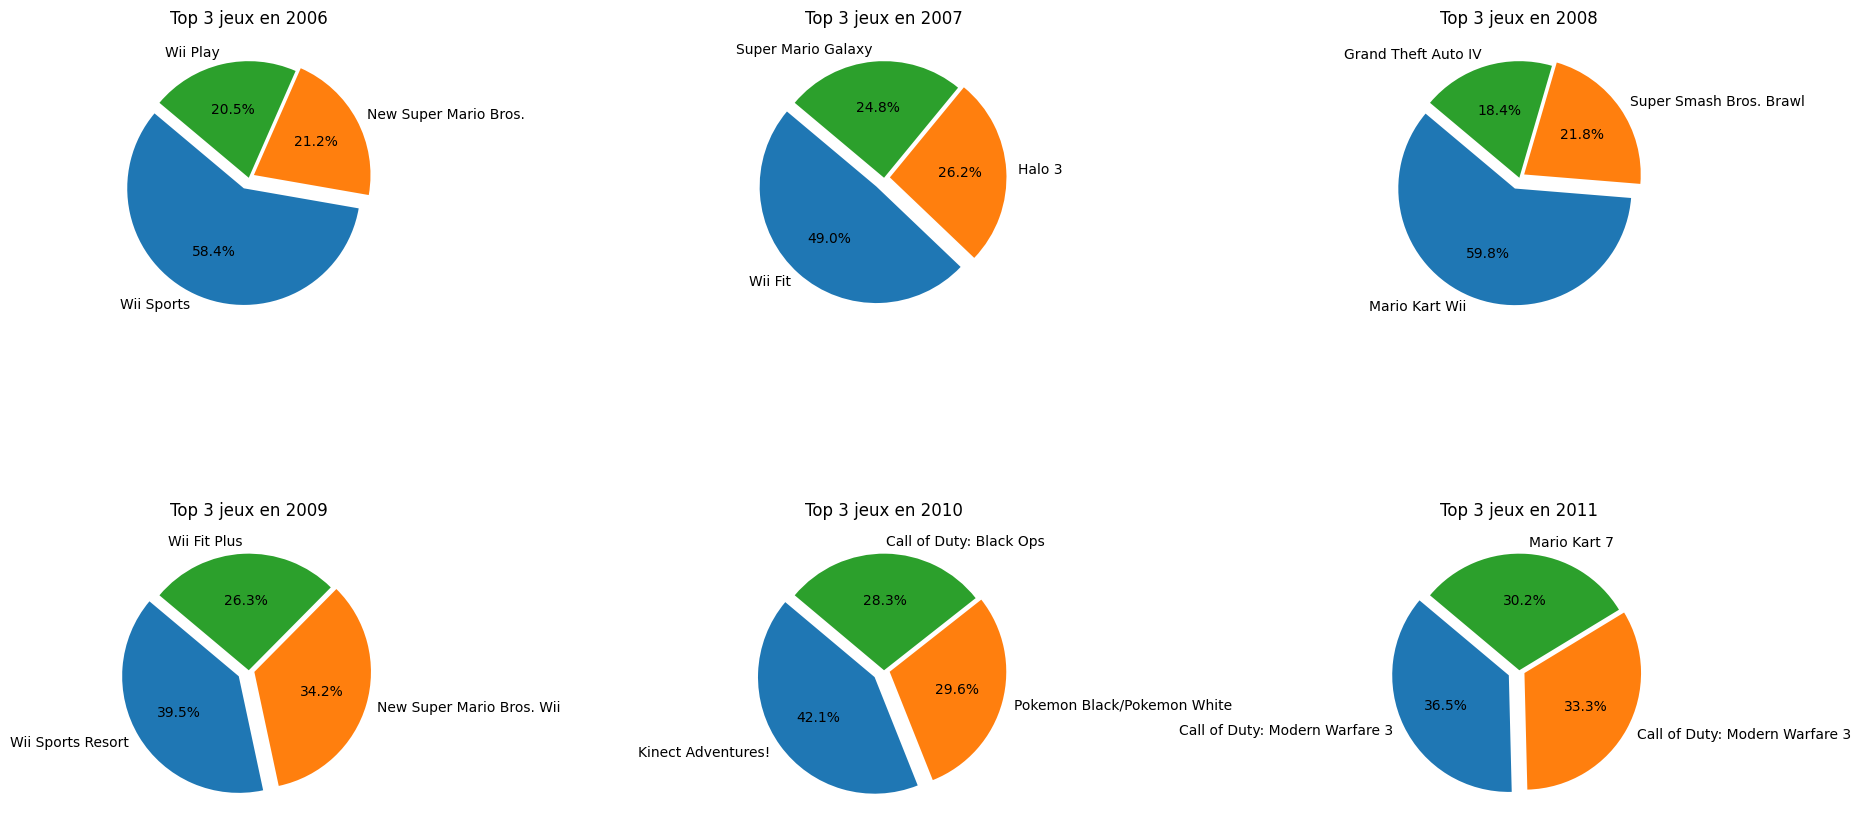

In [33]:
# A présent, on fait un Top 3 meilleurs jeux vendus sur meilleures années : 2006, 2007, 2008, 2009, 2010, 2011
years_of_interest = [2006, 2007, 2008, 2009, 2010, 2011]
filtered_df_by_year = df[df['Year'].isin(years_of_interest)]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, year in enumerate(years_of_interest):
    top_3_games = filtered_df_by_year[filtered_df_by_year['Year'] == year].nlargest(3, 'Global_Sales')
    labels = top_3_games['Name']
    sizes = top_3_games['Global_Sales']
    explode = [0.1, 0.05, 0]
    ax = axes[i // 3, i % 3]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
    ax.set_title(f"Top 3 jeux en {year}")
plt.tight_layout()
plt.show()

A partir de 2010 on observe de meilleures ventes chez Activision ce qui est logique car le genre Action se dévoile. Ainsi gagnent en succès des nouvelles licenses telles Call of Duty ou GTA.

In [6]:
# Top 5 jeux par console
platforms = ["PS", "PS2", "PS3", "PC", "Wii", "XB", "X360"]
top_5_per_platform = {}
for platform in platforms:
    top_5 = df[df["Platform"] == platform].nlargest(5, "Global_Sales")[["Name", "Global_Sales"]]
    top_5_per_platform[platform] = top_5
results = pd.concat(top_5_per_platform, axis=0, keys=top_5_per_platform.keys())
results

Name  Global_Sales
PS   52                             Gran Turismo         10.95
     66                        Final Fantasy VII          9.72
     69                           Gran Turismo 2          9.49
     87                       Final Fantasy VIII          7.86
     95   Crash Bandicoot 2: Cortex Strikes Back          7.58
PS2  17            Grand Theft Auto: San Andreas         20.81
     24              Grand Theft Auto: Vice City         16.15
     28                   Gran Turismo 3: A-Spec         14.98
     38                     Grand Theft Auto III         13.10
     47                           Gran Turismo 4         11.66
PS3  16                       Grand Theft Auto V         21.40
     34               Call of Duty: Black Ops II         14.03
     37           Call of Duty: Modern Warfare 3         13.46
     40                  Call of Duty: Black Ops         12.73
     54                           Gran Turismo 5         10.77
PC   83                               The Sims 3          8.11
     137                       World of Warcraft          6.28
     181                              Diablo III          5.20
     194              Microsoft Flight Simulator          5.12
     217          StarCraft II: Wings of Liberty          4.83
Wii  0                                Wii Sports         82.74
     2                            Mario Kart Wii         35.82
     3                         Wii Sports Resort         33.00
     7                                  Wii Play         29.02
     8                 New Super Mario Bros. Wii         28.62
XB   79                                   Halo 2          8.49
     129                    Halo: Combat Evolved          6.43
     464              Tom Clancy's Splinter Cell          3.02
     507        The Elder Scrolls III: Morrowind          2.86
     568                                   Fable          2.66
X360 15                       Kinect Adventures!         21.82
     23                       Grand Theft Auto V         16.38
     29           Call of Duty: Modern Warfare 3         14.76
     31                  Call of Duty: Black Ops         14.64
     35               Call of Duty: Black Ops II         13.73

In [ ]:
# On ne conserve que ce dont on a besoin pour la suite
platforms = ["Wii", "PS", "PS2", "PS3", "PS4", "PC", "XB", "X360", "XBOne"]
df = df[df["Platform"].isin(platforms)]
publishers = [
    "Activision", "Eidos Interactive", "Electronic Arts", "Microsoft Game Studios",
    "Nintendo", "Sony Computer Entertainment", "Take-Two Interactive", "Ubisoft"
]
df = df[df["Publisher"].isin(publishers)]
df["Others publishers"] = df["Publisher"].apply(lambda x: x if x in publishers else "Other")